In [79]:
import os
import pandas as pd

dataset_path = "C:/Users/pc/Downloads/fer2013/versions/1/train"
categories = ['angry', 'happy', 'sad', 'surprise', 'neutral','fear']

# Liste pour stocker les données
data = []

# Parcours des sous-dossiers
for category in categories:
    category_path = os.path.join(dataset_path, category)
    
    # Vérifier que le dossier existe
    if not os.path.exists(category_path):
        print(f"Le dossier {category_path} n'existe pas.")
        continue
    
    # Parcourir toutes les images dans le sous-dossier
    for filename in os.listdir(category_path):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            img_path = os.path.join(category_path, filename)
            data.append([img_path, category])

# Créer un DataFrame à partir des données collectées
df = pd.DataFrame(data, columns=["image", "label"])

# Sauvegarder le DataFrame dans un fichier CSV
df.to_csv("dataset.csv", index=False)

print(f"Le fichier CSV a été créé avec {len(df)} entrées.")


Le fichier CSV a été créé avec 28273 entrées.


In [81]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import cv2

# Charger le CSV créé
df = pd.read_csv('dataset.csv')

# Initialiser les listes pour les images et les labels
images = []
labels = []

# Charger chaque image et étiquette
for i, row in df.iterrows():
    img_path = row['image']
    label = row['label']
    
    # Charger l'image et la convertir en niveaux de gris
    img = image.load_img(img_path, target_size=(48, 48), color_mode="grayscale")
    img_array = image.img_to_array(img)  # Convertir en tableau numpy
    img_array = img_array / 255.0  # Normaliser les pixels entre 0 et 1
    
    # Ajouter l'image et l'étiquette aux listes
    images.append(img_array)
    labels.append(label)

# Convertir les images et les labels en tableaux numpy
images = np.array(images)
labels = np.array(labels)

# Convertir les labels en indices (par exemple: 'angry' -> 0, 'happy' -> 1, etc.)
category_dict = {'angry': 0, 'happy': 1, 'sad': 2, 'surprise': 3, 'neutral': 4,'fear': 5}
labels = np.array([category_dict[label] for label in labels])

# Convertir les labels en format one-hot
labels = to_categorical(labels, num_classes=len(category_dict))

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Afficher les formes des ensembles de données
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")


Training set shape: (22618, 48, 48, 1), Test set shape: (5655, 48, 48, 1)


In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Créer un modèle CNN
model = Sequential()

# Première couche convolutionnelle
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Deuxième couche convolutionnelle
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Troisième couche convolutionnelle
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplatir les résultats des couches convolutionnelles
model.add(Flatten())

# Couche entièrement connectée
model.add(Dense(128, activation='relu'))

# Ajouter un Dropout pour éviter le surapprentissage
model.add(Dropout(0.5))

# Couche de sortie
model.add(Dense(len(category_dict), activation='softmax'))  # Une sortie pour chaque classe

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Afficher un résumé du modèle
model.summary()


C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,126 (1.85 MB)

 Trainable params: 485,126 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 65s 178ms/step - accuracy: 0.2505 - loss: 1.7590 - val_accuracy: 0.3577 - val_loss: 1.6201
Epoch 2/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 63s 179ms/step - accuracy: 0.3639 - loss: 1.5775 - val_accuracy: 0.4364 - val_loss: 1.4223
Epoch 3/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 64s 180ms/step - accuracy: 0.4401 - loss: 1.4145 - val_accuracy: 0.4798 - val_loss: 1.3104
Epoch 4/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 66s 185ms/step - accuracy: 0.4889 - loss: 1.3140 - val_accuracy: 0.5093 - val_loss: 1.2706
Epoch 5/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 65s 183ms/step - accuracy: 0.5090 - loss: 1.2715 - val_accuracy: 0.5160 - val_loss: 1.2542
Epoch 6/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 63s 178ms/step - accuracy: 0.5223 - loss: 1.2171 - val_accuracy: 0.5436 - val_loss: 1.1962
Epoch 7/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 63s 179ms/step - accuracy: 0.5412 - loss: 1.1724 - val_accuracy: 0.5224 - val_loss: 1.2473
Epoch 8/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 64s 180ms/step - accuracy: 0.5615 - loss: 1

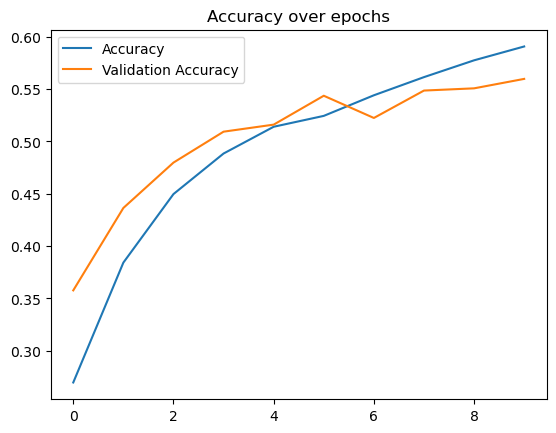

In [85]:
# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Sauvegarder le modèle pour une utilisation future
model.save("expression_recognition_model.h5")

# Afficher l'historique de l'entraînement
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy over epochs")
plt.show()


In [87]:
# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.5559 - loss: 1.1467
Test accuracy: 0.5596817135810852


In [63]:
import os
print(f"Répertoire courant : {os.getcwd()}")


Répertoire courant : C:\Users\pc\Documents


In [96]:
%pip install flask


Note: you may need to restart the kernel to use updated packages.


In [98]:
pip show flask


Name: Flask
Version: 3.0.0
Summary: A simple framework for building complex web applications.
Home-page: 
Author: 
Author-email: 
License: 
Location: C:\Users\pc\anaconda3\Lib\site-packages
Requires: blinker, click, itsdangerous, Jinja2, Werkzeug
Required-by: Flask-Cors, Flask-SocketIO, mvc-flask
Note: you may need to restart the kernel to use updated packages.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Expression prédite : happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Expression prédite : surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Expression prédite : happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Expression prédite : happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Expression prédite : happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Expression prédite : angry


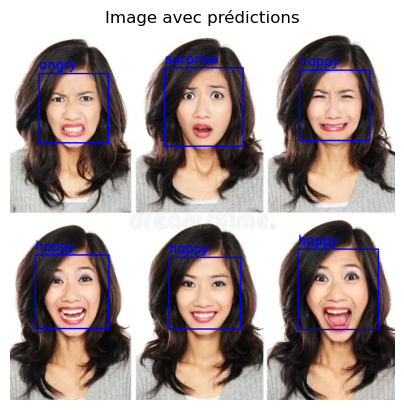

In [93]:
import cv2
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array

# Charger le modèle pré-entraîné pour la reconnaissance des expressions
model = load_model("expression_recognition_model.h5")

# Catégories d'expressions
categories = ['angry', 'happy', 'sad', 'surprise', 'neutral', 'fear']

# Charger l'image
img_path = "C:/Users/pc/Downloads/ll.jpg"  # Chemin de l'image
image = cv2.imread(img_path)

# Vérifier si l'image est correctement chargée
if image is None:
    print("Erreur : Impossible de charger l'image. Vérifiez le chemin.")
else:
    # Convertir l'image en niveaux de gris
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Vérifier si l'image est déjà recadrée autour d'un visage
    if gray.shape == (48, 48):
        # Traiter directement l'image FER2013
        face = gray / 255.0  # Normaliser les pixels
        face = np.expand_dims(face, axis=-1)  # Ajouter une dimension pour les niveaux de gris
        face = np.expand_dims(face, axis=0)   # Ajouter une dimension pour le batch

        # Prédire l'expression faciale
        prediction = model.predict(face)
        predicted_class = np.argmax(prediction, axis=1)
        predicted_expression = categories[predicted_class[0]]

        # Afficher le résultat
        print(f"Expression prédite : {predicted_expression}")

        # Afficher l'image avec la prédiction
       
        plt.imshow(gray, cmap='gray')
        plt.title(f"Expression prédite : {predicted_expression}")
        plt.axis("off")
        plt.show()
    else:
        # Utiliser Haar Cascade pour détecter les visages
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=7)

        # Vérifier si des visages sont détectés
        if len(faces) == 0:
            print("Aucun visage détecté dans l'image.")
        else:
            # Traiter chaque visage détecté
            for (x, y, w, h) in faces:
                # Extraire la région du visage
                face = gray[y:y+h, x:x+w]
                    

                # Prétraiter le visage pour le modèle
                face = cv2.resize(face, (48, 48))  # Redimensionner à 48x48 pixels
                face = face / 255.0  # Normaliser les pixels
                face = np.expand_dims(face, axis=-1)  # Ajouter une dimension pour les niveaux de gris
                face = np.expand_dims(face, axis=0)   # Ajouter une dimension pour le batch

                # Prédire l'expression faciale
                prediction = model.predict(face)
                predicted_class = np.argmax(prediction, axis=1)
                predicted_expression = categories[predicted_class[0]]

                # Afficher le résultat
                print(f"Expression prédite : {predicted_expression}")

                # Dessiner un rectangle autour du visage et afficher la prédiction
                cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
                cv2.putText(image, predicted_expression, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

            # Afficher l'image avec les rectangles et prédictions
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title("Image avec prédictions")
            plt.axis("off")
            plt.show()

177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step
Rapport de classification (classification report) :
              precision    recall  f1-score   support

       angry       0.52      0.48      0.50       789
       happy       0.75      0.77      0.76      1466
         sad       0.42      0.51      0.46       984
    surprise       0.67      0.69      0.68       605
     neutral       0.49      0.58      0.53      1003
        fear       0.37      0.19      0.25       808

    accuracy                           0.56      5655
   macro avg       0.54      0.54      0.53      5655
weighted avg       0.55      0.56      0.55      5655



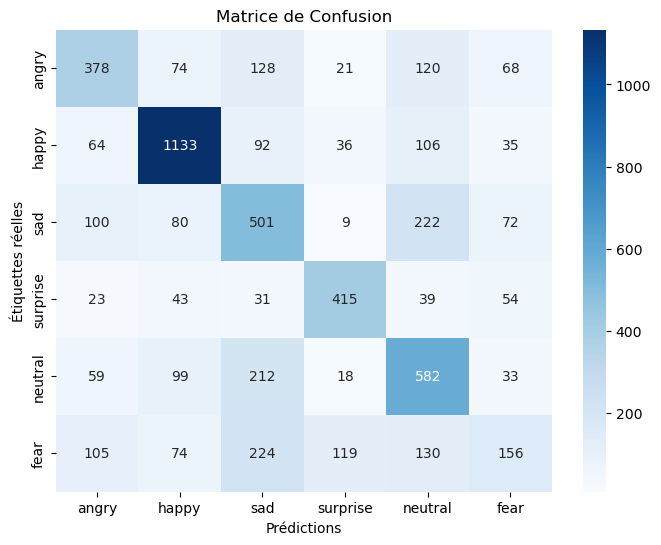

In [95]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le modèle pré-entraîné
model = load_model("expression_recognition_model.h5")

# Catégories d'expressions
categories = ['angry', 'happy', 'sad', 'surprise', 'neutral', 'fear']

# Charger le jeu de données FER2013 ou un dataset personnalisé
# Ici on suppose que X_test et y_test sont déjà préparés, comme dans les étapes précédentes.

# Prédire les expressions pour l'ensemble de test
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Calcul des métriques d'évaluation : précision, rappel, F1-score
print("Rapport de classification (classification report) :")
print(classification_report(np.argmax(y_test, axis=1), predicted_classes, target_names=categories))

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predicted_classes)

# Affichage de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Étiquettes réelles')
plt.show()


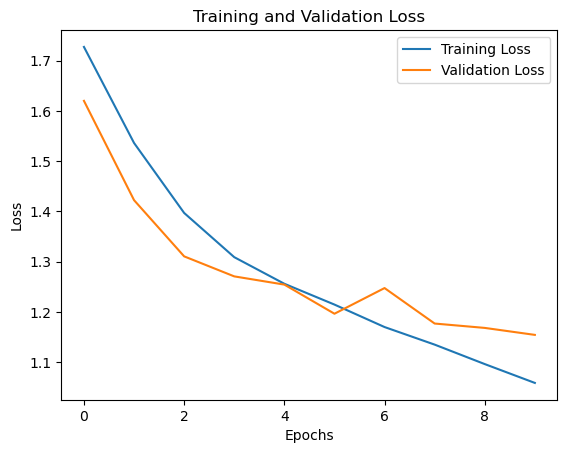

In [97]:
# Afficher la courbe de perte (Loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
